# Module 2 - Uncertainty and Entropy II

Author: Julio Correa, 2020; based on the original Matlab tutorials.<br/>
Adaptations by: J. Lizier, 2023-

The following block aims to import all the relevant libraries to analyse data

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Preparing your environment

In this and later notebooks, we want to use functions we have defined in our previous work in other notebooks.

You have several choices on how to handle this:
1. Add the `ipynb` library (`pip3 install ipynb`) and then you can use import statements such as `from ipynb.fs.full.Module_1_notebook import entropy`. This is quick, but a bit ugly (it runs the whole notebook and will output it under your import command).
2. $\star$ Edit the `simpleinfotheory.py` script to gather your functions as you write them, and import the required functions from this. Long term I think this is a better solution for you.

In [17]:
from helper import infocontent, entropy

# 5. Coding Shannon entropy for empirical data

In this exercise we continue to alter the Python code in the next cell to measure the Shannon entropy. This time, let's code it not from a given distribution $p(x)$, but from empirical data of samples $x$ of the variable $X$.

Your task is to edit the function <code>entropyempirical(xn)</code> in the next cell to return the Shannon entropy for the given samples $x_n$ of $X$ (n is the sample index). Note that the input <code>xn</code> is a vector, with each entry representing one sample.

1. Examine the code template in the next cell. The first task the code performs is to work out the alphabet $A_X$ (contained in the variable <code>symbols</code>) that the samples are drawn from. Then the code template counts the number of occurrences of each symbol of the alphabet in the samples, normalises those counts into probabilities, and then computes the entropy from that. Fill out the code to perform these tasks where indicated with <code>???</code>.

In [20]:
""" function entropyempirical(xn)
Computes the Shannon entropy over all outcomes x of a random variable
X from samples x_n.

Inputs:
- xn - samples of outcomes x.
   xn is a column vector, e.g. xn = [0;0;1;0;1;0;1;1;1;0] for a binary variable.

Outputs:
- result - Shannon entropy over all outcomes
- symbols - list of unique samples
- probabilities - probabilities for each sample

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def entropyempirical(xn):

    # First, error checking, and converting argument into standard form:    
    if not isinstance(xn, np.ndarray):
        xn = np.array(xn)

    xn = np.reshape(xn,(-1, 1)) #reshaping our 1-dim vector to numpy format of a column vector
    
    # We need to work out the alphabet here.
    # The following returns a vector of the alphabet:    
    [symbols, counts] = np.unique(xn, axis=0, return_counts=True)

    # Now normalise the counts into probabilities:
    probabilities = counts / np.sum(counts)
    
    # Once we have the probabilities we can simply call our existing function:
    result = entropy(probabilities)
    
    return result, symbols, probabilities

2. Test your code on some vectors of empirical data, e.g. <code>entropyempirical([0,0,1,1])</code> should return 1 bit. Design other test data sets where you know what the result should be, and test them.

In [23]:
# Test the following case and add more cases:
(result, symbols, probabilities) = entropyempirical([0,0,1,1])
print("Entropy: ", result)

Entropy:  1.0


3. What do you expect the average entropy of coin tosses to be? Toss a coin yourself 10 times, recording the results for each toss, and create a vector of boolean values to represent these samples. Call <code>entropyempirical</code> with this vector of samples -- did it return the result you expected? Try your experiment again and see if the result changed. Explain your results here.

Empirical Entropy Statistics: 


count    10000.000000
mean         0.925955
std          0.108830
min          0.000000
25%          0.881291
50%          0.970951
75%          1.000000
max          1.000000
dtype: float64

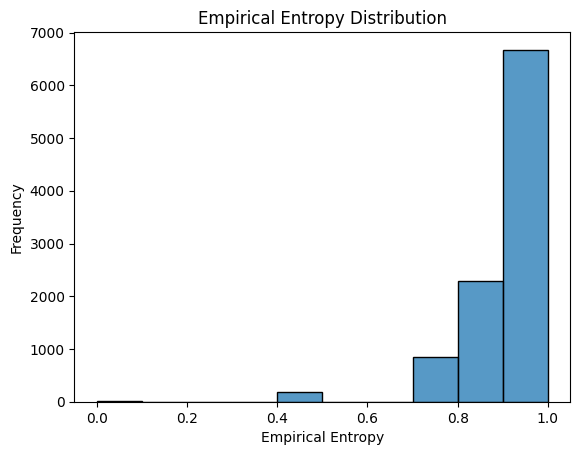

In [90]:
# Compute the empirical entropy from your coin tosses here:
# 1000 experiments of 10 coin tosses
result_entropies = []
for i in range(10000):
    coin_tosses_experiment = np.random.randint(0, 2, 10)
    (result, symbols, probabilities) = entropyempirical(coin_tosses_experiment)
    result_entropies.append(result)

print("Empirical Entropy Statistics: ")
display(pd.Series(result_entropies).describe())

# use sns to plot the distribution of the empirical entropies
sns.histplot(result_entropies, bins=10)
plt.xlabel("Empirical Entropy")
plt.ylabel("Frequency")
plt.title("Empirical Entropy Distribution")
plt.show()

4. Create boolean samples from random data, e.g. with <code>np.random.randint(0, 2, 10)</code>, and call <code>entropyempirical</code> with this vector of samples. Again -- does it return the result you expected? Try longer data sets, and also samples drawn from larger alphabets, and interpret the results.

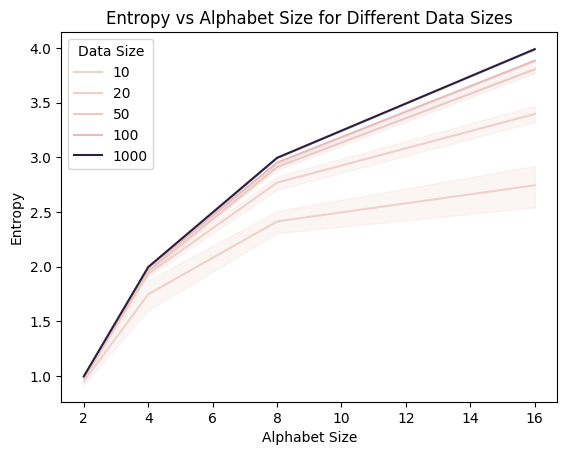

In [76]:
# Compute the entropy of your randomly generated samples here:
experiment_cnt = 10
alphabet_sizes = [2, 4, 8, 16]
data_sizes = [10, 20, 50, 100, 1000]

results = []

for alphabet_size in alphabet_sizes:
    for data_size in data_sizes:
        for _ in range(experiment_cnt):
            data = np.random.randint(0, alphabet_size, data_size)
            result, _, _ = entropyempirical(data)
            results.append((alphabet_size, data_size, result))

df = pd.DataFrame(results, columns=['Alphabet Size', 'Data Size', 'Entropy'])

# Plotting the results using Seaborn
sns.lineplot(data=df, x='Alphabet Size', y='Entropy', hue='Data Size')

plt.title('Entropy vs Alphabet Size for Different Data Sizes')
plt.xlabel('Alphabet Size')
plt.ylabel('Entropy')
plt.legend(title='Data Size')
plt.show()

- Data Size Effect: The entropy is higher and more robust for bigger data size. Intrestingly, when data is insufficient, the entropy is lower, I think is because of the uneven distribution sample from uniform distribution.

# 7. Coding Joint entropy

In this exercise we continue to alter the code templates to measure the joint entropy for a distribution $p(x,y)$:

$H\left(X,Y\right)=-\sum_{x,y}p\left(x,y\right)\log p\left(x,y\right)$

Your task is to edit the function <code>jointentropy(p)</code> in the next cell to return the Shannon entropy for the given distribution $p(x,y)$ over joint outcomes $\{x,y\}$ of variables $X,Y$.

Note the input argument to the function is a matrix <b>p</b>, representing the probability mass for each joint outcome of ${x,y}$. That is, <b>p</b> is a matrix with the $(i,j)$th entry in the matrix giving the probability for the joint outcome of the $i$th value that $x$ may take along with the $j$th value that $y$ may take. The sum of the items in the matrix <code>p</code> must be 1.

For example, for a binary x and y we could have <code>p = np.array([[0.2, 0.3], [0.1, 0.4]])</code> where $p(x=0,y=0) = 0.2$, $p(x=0,y=1) = 0.3$, $p(x=1,y=0) = 0.1$, and $p(x=1,y=1) = 0.4$. If the variable $x$ can take more than two values for example, then we will have more than two rows in <code>p</code>.

1. To get started, think about whether you can make simple changes to your code from <code>entropy(p)</code> to extend it to work here:

In [ ]:
""" function jointentropy(p)
Computes the joint Shannon entropy over all outcome vectors x of a vector
random variable X with probability matrix p(x) for each candidate outcome
vector x.

Inputs:
- p - probability distribution function over all outcome vectors x.
   p is a matrix over all combinations of the sub-variables of x,
where p(1,3) gives the probability of the first symbol of sub-variable
x1 co-occuring with the third symbol of sub-variable x2.
   E.g. p = [0.2, 0.3; 0.1, 0.4]. The sum over p must be 1.

Outputs:
- result - joint Shannon entropy of the probability distribution p

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def jointentropy(p):
    
	# Should we check any potential error conditions on the input?

	# We need to take the expectation value over the Shannon info content at
	#  p(x) for each outcome x in the joint PDF:
	# Hint: will your code for entropy(p) work, or can you alter it slightly
	#  to make it work?
    
    joint_entropy = ???
    
    return joint_entropy

2. Test that your code works, e.g. by running <code>jointentropy(np.array([[0.2, 0.3],[ 0.1, 0.4]]))</code> and validating that you get the result 1.85 bits. Come up with some other test cases to check, e.g. could you check similar boundary cases to what we used to test <code>entropy(p)</code> in the previous module?

In [ ]:
# Test the sample:
print( jointentropy(np.array([[0.2, 0.3],[ 0.1, 0.4]])) )
# Add other tests:


3. _Challenge_: try dropping the assumption that the input argument <code>p</code> is of 2 dimensions, but allow it to be a matrix of arbitrary dimensions. Can you do this with no or minimal changes to the code?<br/>
Hint: the <code>numpy.sum()</code> and <code>numpy.nansum()</code> methods will sum all array elements (rather than along one dimension only) by default. (You can see that this is used in the solution code for <code>entropy(p)</code>).

# 8. _(Optional extension)_ Coding joint entropy for empirical data

We continue with the Python code templates to measure the joint entropy from empirical data of samples $x$ of the variable $X$.

This is already implemented in this Python function <code>jointentropyempirical(xn)</code>, to return the joint entropy for the given samples $x_n$ of $X$ ($n$ is the sample index). Note that the input <code>xn</code> is a matrix, where rows (the first array dimension) represent samples and columns (the second array dimension) represent variables; i.e. <code>xn=[[0,1], [1,1], [1,0]]</code> represents 3 samples of 2 variables. There will always be multiple rows (because we always should have many samples), but the number of columns will depend on how many variables we are jointly considering (it could be just one if we have only a single variable).

1. Examine the code in the next cell. Most of the code actually pre-processes the input arguments, before it maps a distinct symbol for each unique row in <code>xn</code> and then asks <code>entropyempirical()</code> to calculate the entropy.

In [ ]:
""" function jointentropyempirical(xn, yn)
Computes the Shannon entropy over all outcome vectors x of a vector random
variable X from sample vectors x_n. User can call with two such arguments 
if they don't wish to join them outside of the call.

Inputs:
- xn - matrix of samples of outcomes x. May be a 1D vector of samples
    (in which case yn is also supplied), or
    a 2D matrix, where each row is a vector sample for a multivariate X
    (in which case yn is not supplied).
- yn - as per xn, except that yn is not required to be supplied (in which
 case the entropy is only calculated over the multivariate xn variable).

Outputs:
- result - joint Shannon entropy over all samples
- symbols - list of unique joint vector samples
- probabilities - probabilities for each joint symbol

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def jointentropyempirical(xn, yn=[]):
    
    # First, error checking, and converting argument into standard form:    
    xn = np.array(xn)
    # Convert to column vectors if not already:
    if xn.ndim == 1:
        xn = np.reshape(xn,(len(xn),1))
    yn = np.array(yn)
    if (yn.size > 0):
        # Convert to column vectors if not already:
        if yn.ndim == 1:
            yn = np.reshape(yn,(len(yn),1))
        [rx,cx] = xn.shape
        [ry,cy] = yn.shape
        # Check that their number of rows are the same:
        assert(rx == ry)
        # Now joint them up so we only need work with xn
        xn = np.concatenate((xn,yn), axis=1)
        
    # TRICK: Next combine the row vectors in each sample into a single 
    #  symbol (being the index from the symbols array,
    # so that we can simply compute entropy on that combined symbol
    [symbols, symbolIndexForEachSample] = np.unique(xn, axis=0, return_inverse=True)

    # And compute the entropy using our existing function:
    [result, symbols_of_indices, probabilities] = entropyempirical(symbolIndexForEachSample);

    # The order of symbols is the same as their order for the probabilities

    return result, symbols, probabilities

2. Test the code on some vectors of empirical data, e.g. <code>jointentropyempirical([[0,1],[0,0],[1,0],[1,1]])</code> should return 2 bits since we provided 4 distinct equiprobable samples. Design other test data sets where you know what the result should be, and test them.

In [ ]:
# Test the sample:
(jentropyResult, symbols, probabilities) = jointentropyempirical([[0,1],[0,0],[1,0],[1,1]])
print(jentropyResult)
# Add other tests:


# 10. Coding Conditional entropy
In this exercise we continue to alter the Python code templates to measure the conditional entropy for a distribution $p(x,y)$:

 $\begin{aligned}
H\left(X\mid Y\right)=&-\sum_{x,y}p\left(x,y\right)\log p\left(x\mid y\right)\\
=&-\sum_{x,y}p\left(x,y\right)\left(\log p\left(x,y\right)-\log p\left(y\right)\right)\\
=&H\left(X,Y\right)-H\left(Y\right)
\end{aligned}$
<br>

Your task is to edit the Python function <code>conditionalentropy(p)</code> in the next cell to return the conditional entropy for the given distribution $p(x,y)$ over joint outcomes $\{x,y\}$ of variables $X,Y$.

As above for the joint entropy, the input argument to the function is a matrix $p$, representing the probability mass for each joint outcome of $\{x,y\}$.

1. To fill in the template, you will need to call your existing functions <code>entropy(p)</code> for $H(Y)$ and <code>jointentropy(p)</code> for $H(X,Y)$ to provide the calculations needed. Note that to compute $H(Y)$ you will need to extract $p(y)$ from the $p(x,y)$ matrix by summing over all $x$ rows.


In [ ]:
"""function conditionalentropy(p)

Computes the conditional Shannon entropy over all outcomes x of a random
variable X, given outcomes y of a random variable Y.
Probability matrix p(x,y) is given for each candidate outcome
(x,y).

Inputs:
- p - 2D probability distribution function over all outcomes (x,y).
   p is a matrix over all combinations of x and y,
where p(1,3) gives the probability of the first symbol of variable
x co-occuring with the third symbol of variable y.
   E.g. p = [0.2, 0.3; 0.1, 0.4]. The sum over p must be 1.

Outputs:
- result - conditional Shannon entropy of X given Y

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def conditionalentropy(p):
    
    # First make sure the array is now a numpy array
    if type(p) != np.array:
        p = np.array(p)

    # Should we check any potential error conditions on the input?
    # a. Should we check p is a matrix, not a vector?
    # Actually we won't since a vector would be valid if one variable only ever took one value.
    # b. Check that the probabilities normalise to 1:
    if (abs(np.sum(p) - 1) > 0.00001):
        raise Exception("Probability distribution must sum to 1: sum is %.4f" % np.sum(p))

    # We need to compute H(X,Y) - H(X):
    # 1. joint entropy: Can we re-use existing code?
    H_XY = ???;
    # 2. marginal entropy of Y: Can we re-use existing code?
    #  But how to get p_y???
    p_y = ???;
    H_Y = ???;
	
    result = H_XY - H_Y;
    return result

2. Test that your code works, e.g. by running:
    1. `conditionalentropy([[0.2, 0.3], [0.1, 0.4]])` and validating that you get the result 0.965 bits. 
    2. `conditionalentropy([[0.5, 0], [0, 0.5]])` and validating that you get the result 0 bits. 
    3. `conditionalentropy([[0.25, 0.25], [0.25, 0.25]])` and validating that you get the result 1 bit. 

In [ ]:
# Test the code here:


3. Coming back to the Guess Who? example using the [Kooky character sheet](https://web.archive.org/web/20170215034006/http://www.hasbro.com/upload/guesswho/GWc_Kooky-en_GB.pdf), compute the conditional entropy of whether the character has horns given that they have eyebrows, i.e. $H(horns | eyebrows)$? Construct first the table $p(horns, eyebrows)$ for all 4 combinations of these two binary variables, then pass this to your function.  Is $H(eyebrows | horns)$ the same?<br/>
Can you identify two traits where the conditional entropy drops the entropy significantly compared to the unconditioned? What would such a reduction in uncertainty mean?

In [ ]:
# Construct the table p(horns,eyebrows)
#                  [[h_0_e_0, h_0_e_1], [h_1_e_0, h_1_e_1]]

# Compute H(horns | eyebrows)

# Compute H(eyebrows | horns)


4. _(Optional)_ Finally, let's code conditional entropy $H(X|Y)$ for empirical samples `xn` and `yn` in the cell below.<br/>
_Hint_: You can call your existing code `jointentropyempirical` and `entropyempirical` to compute $H(X,Y)$ and $H(Y)$ respectively, by passing in `[xn,yn]` and `yn` as arguments to these functions respectively. Test that your code works by running, e.g.:
    1. `conditionalentropyempirical([0,0,1,1],[0,1,0,1])` and validating that you get the result 1 bit.
    2. `conditionalentropyempirical([0,0,1,1],[0,0,1,1])` and validating that you get the result 0 bits.
    3. Can you explain the expected results for these boundary cases?

In [ ]:
"""function conditionalentropyempirical(xn, yn)
Computes the conditional Shannon entropy over all samples xn of a random
variable X, given samples yn of a random variable Y.

Inputs:
- xn - matrix of samples of outcomes x. May be a 1D vector of samples, or
    a 2D matrix, where each row is a vector sample for a multivariate X.
- yn - matrix of samples of outcomes x. May be a 1D vector of samples, or
    a 2D matrix, where each row is a vector sample for a multivariate Y.
    Must have the same number of rows as X.

Outputs:
- result - conditional Shannon entropy of X given Y

Copyright (C) 2020-, Julio Correa, Joseph T. Lizier
Distributed under GNU General Public License v3
"""
def conditionalentropyempirical(xn, yn):
    
    # First, error checking, and converting argument into standard form:    
    xn = np.array(xn)
    # Convert to column vectors if not already:
    if xn.ndim == 1:
        xn = np.reshape(xn,(len(xn),1))
    yn = np.array(yn)
    if yn.ndim == 1:
        yn = np.reshape(yn,(len(yn),1))
    [rx,cx] = xn.shape
    [ry,cy] = yn.shape

    # Should we check any potential error conditions on the input?
    # Check that their number of rows are the same:
    assert(rx == ry)
    
    # We need to compute H(X,Y) - H(X):
    # 1. joint entropy: Can we re-use existing code?
    (H_XY, xySymbols, xyProbs) = ???;
    # 2. marginal entropy of Y: Can we re-use existing code?
    (H_Y, ySymbols, yProbs) = ???;
	
    result = H_XY - H_Y;
    return result

In [ ]:
# Run the boundary cases:
print( conditionalentropyempirical([0,0,1,1],[0,1,0,1]) )
print( conditionalentropyempirical([0,0,1,1],[0,0,1,1]) )